<a href="https://www.kaggle.com/code/yasmin54301/aus-rainfall-prediction?scriptVersionId=110642128" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

- INTRODUCTION      
  
- DATA DESCRIPTION     

- IMPORTING LIBRARIES     

- LOADING DATA     

- EDA     

- DATA PREPROCESSING     

- MODEL BUILDING      

- EVALUATION     


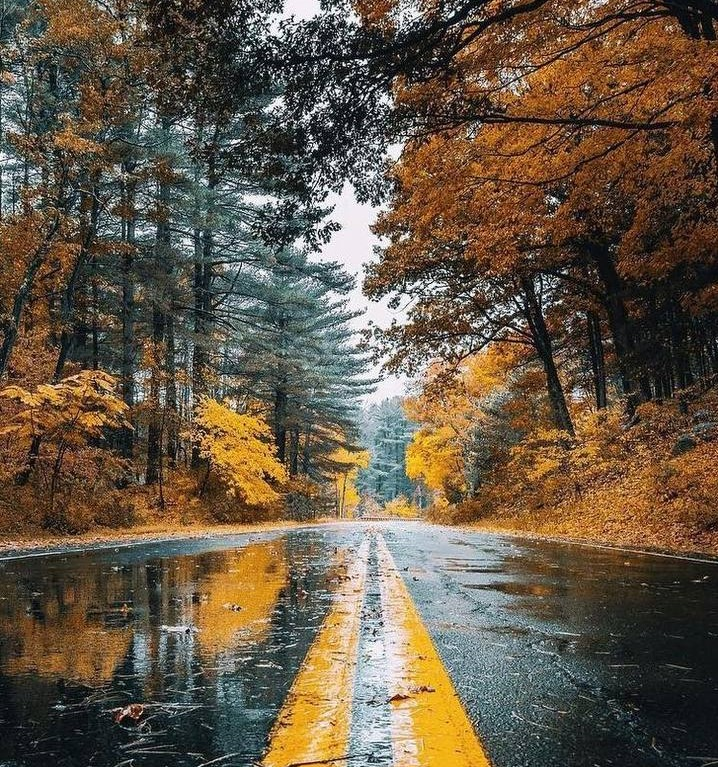

# Introduction

**Rainfall Prediction** is one of the difficult and uncertain tasks that have a significant impact on human society. Timely and accurate forecasting can proactively help reduce human and financial loss. This study presents a set of experiments that involve the use of common machine learning techniques to create models that can predict whether it will rain tomorrow or not based on the weather data for that day in major cities in Australia using a 10 year historical rainfall data that comes in csv file format. After doing primary data exploration, we will try to predict next day rainfall for different regions in Australia.


# Data Description

**Date:**  The date of observation       
**Location:** The common name of the location of the weather station       
**MinTemp:**  The minimum temperature in degrees celsius    
**MaxTemp:** The maximum temperature in degrees celsius     
**Rainfall:** The amount of rainfall recorded for the day in mm     
**Evaporation:** The so-called Class A pan evaporation (mm) in the 24 hours to 9am     
**Sunshine:** The number of hours of bright sunshine in the day.     
**WindGustDir:**  The direction of the strongest wind gust in the 24 hours to midnight    
**WindGustSpeed:**  The speed (km/h) of the strongest wind gust in the 24 hours to midnight    
**WindDir9am:** Direction of the wind at 9am     
**WindDir3pm:** Direction of the wind at 3pm      
**WindSpeed9am:** Wind speed (km/hr) averaged over 10 minutes prior to 9am      
**WindSpeed3pm:** Wind speed (km/hr) averaged over 10 minutes prior to 3pm     
**Humidity9am:** Humidity (percent) at 9am      
**Humidity3pm:** Humidity (percent) at 3pm       
**Pressure9am:** Atmospheric pressure (hpa) reduced to mean sea level at 9am      
**Pressure3pm:** Atmospheric pressure (hpa) reduced to mean sea level at 3pm           
**Cloud9am:** Fraction of sky obscured by cloud at 9am.                
**Cloud3pm:** Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm.     
**Temp9am:** Temperature (degrees C) at 9am     
**Temp3pm:** Temperature (degrees C) at 3pm       
**RainToday:** Did the current day receive precipitation exceeding 1mm in the 24 hours to 9am.  Binary (0 = No, 1 = Yes)     
**RainTomorrow:** Did the next day receive precipitation exceeding 1mm in the 24 hours to 9am.  Binary (0 = No, 1 = Yes)

# Importing Libraries 


In [1]:
import pandas as pd
import numpy as np
from numpy.random import randint 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
%matplotlib inline

#Preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing 

# Split
from sklearn.model_selection import train_test_split, GridSearchCV

#Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, validation_curve, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
import time
from xgboost import XGBClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


# Loading the Data 

In [2]:
data = pd.read_csv("../input/weather-dataset-rattle-package/weatherAUS.csv" )

# EDA with Visualization

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# The number of rows and columns in a dataset
data.shape

(145460, 23)

As shown here, this dataset contains over 145,000 rows and 23 columns including numeric and categorical columns. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

It is observed that there are different types of data type like object, float, and integer.

In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


We can see that the medium temperature in Australia ranges from 12c to 23c, we can also see that the temperature can reach very high levels up to 48.

In [7]:
categorical = data.select_dtypes(include=['object'])
categorical.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


- There are 6 categorical variables. They are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow
- There are two binary categorical variables - RainToday and RainTomorrow
- RainTomorrow is the target variable.

### *Let's check if the dataset is unbalanced or balanced.*

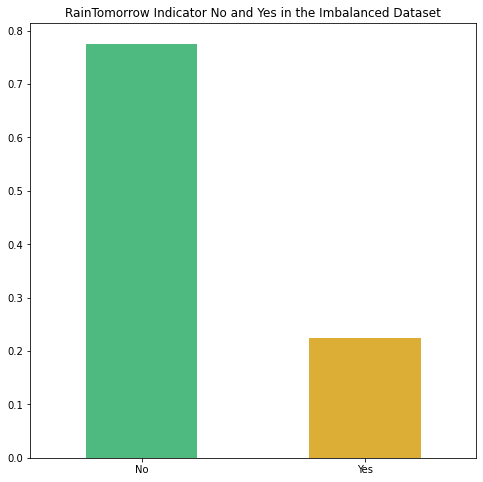

In [8]:
plt.figure(figsize=(8,8))
data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['MediumSeaGreen','Goldenrod'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No and Yes in the Imbalanced Dataset')
plt.show()

We can observe that the ratio between NO and YES is almost 78:22. So there is a class imbalance and we have to deal with it. We will use the oversampling of the minority class as the size of the data is quite small. 

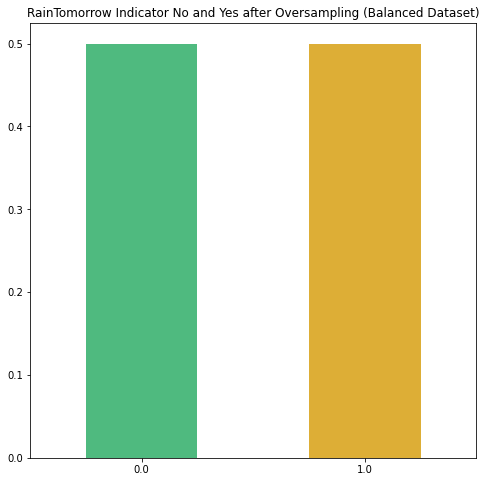

In [9]:
data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
from sklearn.utils import resample

no = data[data.RainTomorrow == 0]
yes = data[data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,8))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['MediumSeaGreen','Goldenrod'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No and Yes after Oversampling (Balanced Dataset)')
plt.show()

In [10]:
oversampled.RainTomorrow.value_counts()

0.0    110316
1.0    110316
Name: RainTomorrow, dtype: int64

### *Correlation between variables*

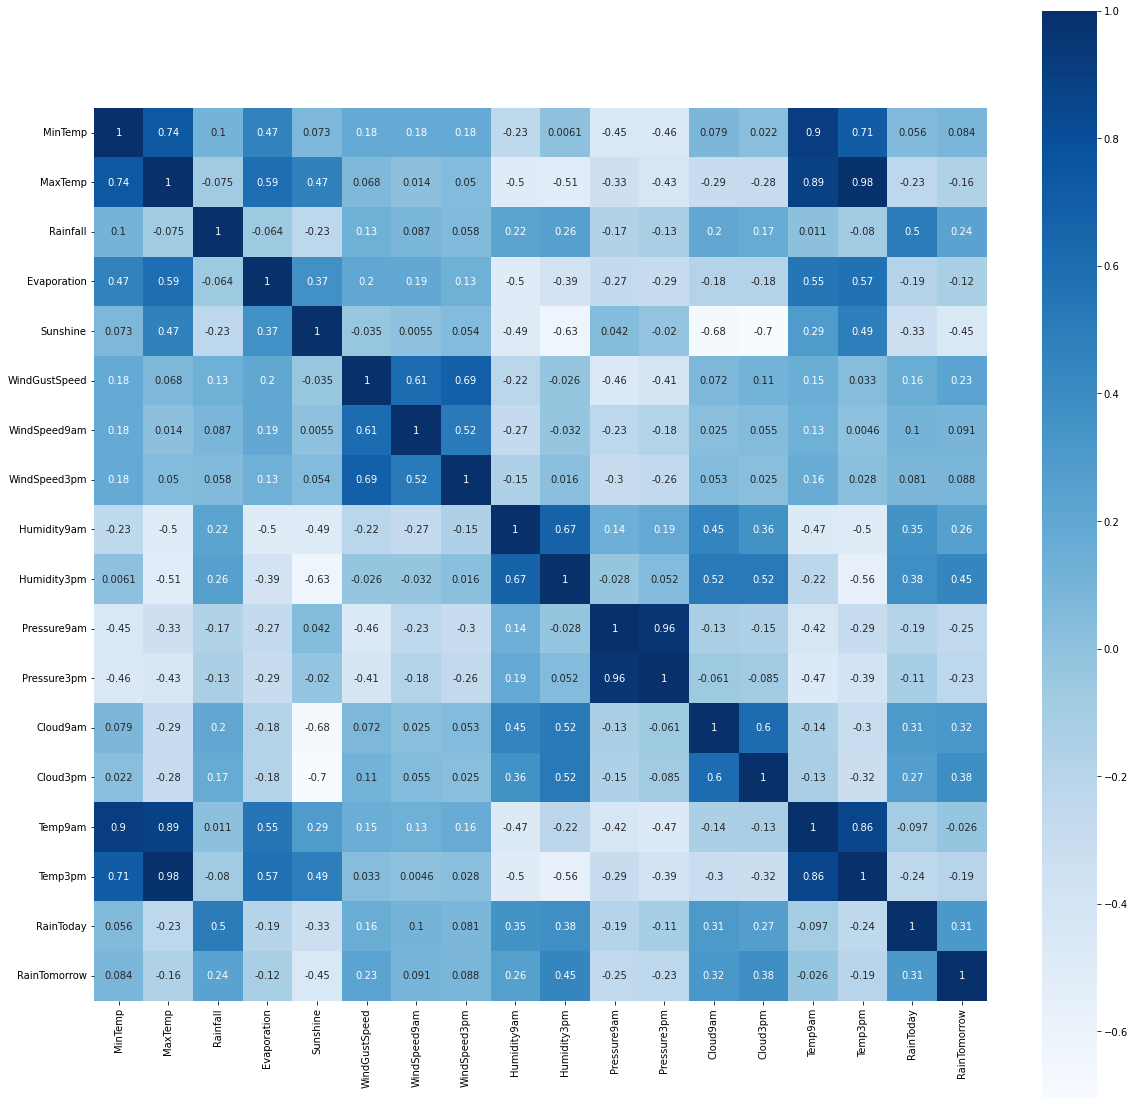

In [11]:
plt.figure(figsize=(20,20))
correlacao = sns.heatmap(data.corr(), square=True, annot=True, cmap='Blues')
correlacao.set_xticklabels(correlacao.get_xticklabels(), rotation=90)          
plt.show()

From the above correlation heat map, we can conclude that :-

- MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).

- MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).

- MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

- MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

- MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

- WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

- Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

- Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).

### *Location of Rainy days* 

In [12]:
rain_by_loc = oversampled.groupby(by='Location').sum()
rain_by_loc = rain_by_loc[['RainToday']]
rain_by_loc.head()

,RainToday
Location,
Adelaide,1457.0
Albany,1978.0
Albury,1274.0
AliceSprings,479.0
BadgerysCreek,1172.0


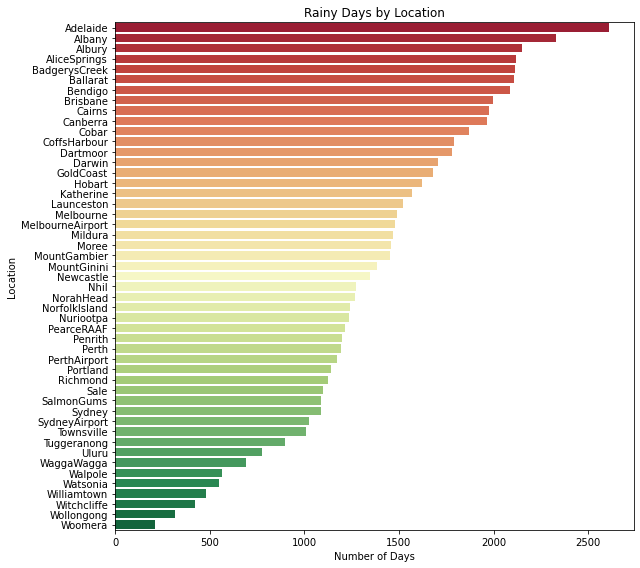

In [13]:
plt.figure(figsize=(9,8))
sns.barplot(x='RainToday', 
            y=rain_by_loc.index, 
            data=rain_by_loc.sort_values('RainToday', ascending=False), 
            orient='h',
            palette='RdYlGn'
           )
plt.xlabel('Number of Days')
plt.title('Rainy Days by Location')
plt.tight_layout();

The above chart tells the differences between locations with regard to the number of rainy days. Adelaide, Albany are the most rainy locations, while Woomera and Wollongong are the least ones.

### *For the distribution of the variable MinTemp, We see that the mean of the minimum temperature in Australia is between 8 and 12 degrees.*

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MinTemp'>

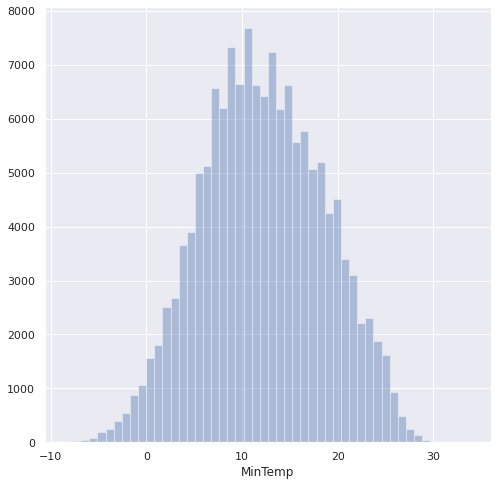

In [14]:
plt.figure(figsize=(8,8))
sns.set(color_codes = True)
sns.distplot(data.MinTemp, kde = False)

### *For the distribution of variable MaxTemp, We see that the mean of the maximum temperature in Australia is between 20 and 23 degrees.¶*

<AxesSubplot:xlabel='MaxTemp'>

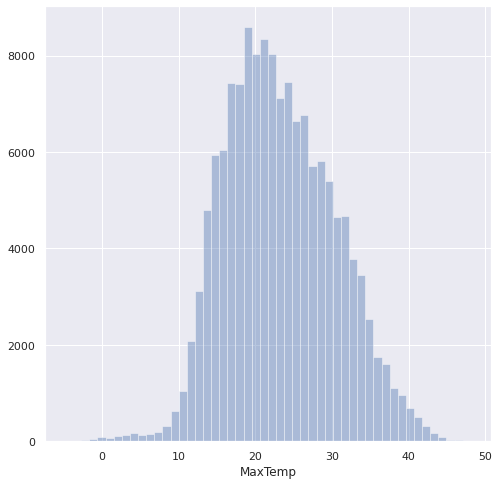

In [15]:
plt.figure(figsize=(8,8))
sns.set(color_codes = True)
sns.distplot(data.MaxTemp, kde = False)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

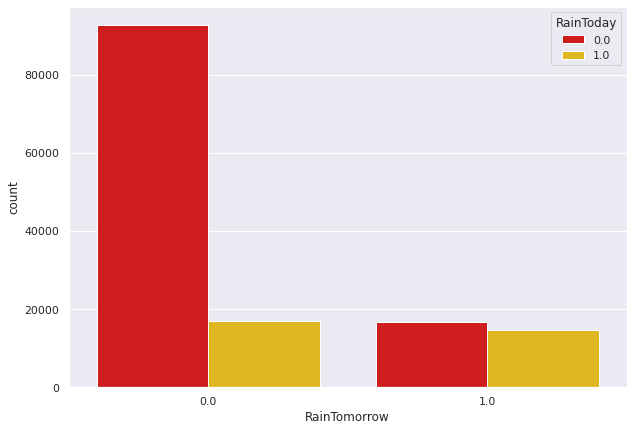

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(x=data.RainTomorrow,hue=data.RainToday,palette='hot')

It is obvious that either it will rain tomorrow or not is greatly dependent on the rainfall today.

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

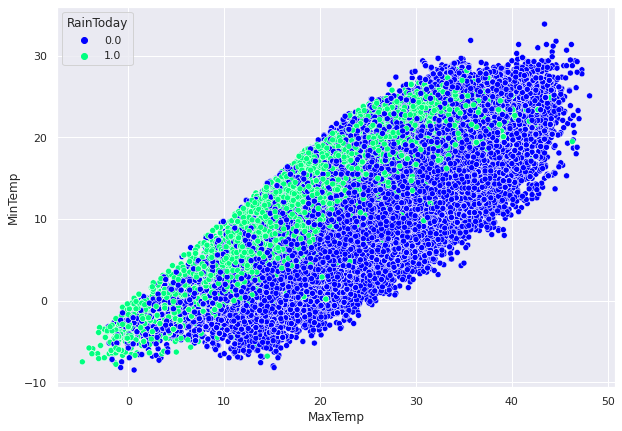

In [17]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='MaxTemp', y='MinTemp', data=oversampled, hue='RainToday',palette='winter')

- It shows a linear positive correlation between minimum temperature and maximum temperature.   
- The figure gives an indication that if it rains today, variation in minimum and maximum temperature is low.

<AxesSubplot:xlabel='Temp3pm', ylabel='Humidity3pm'>

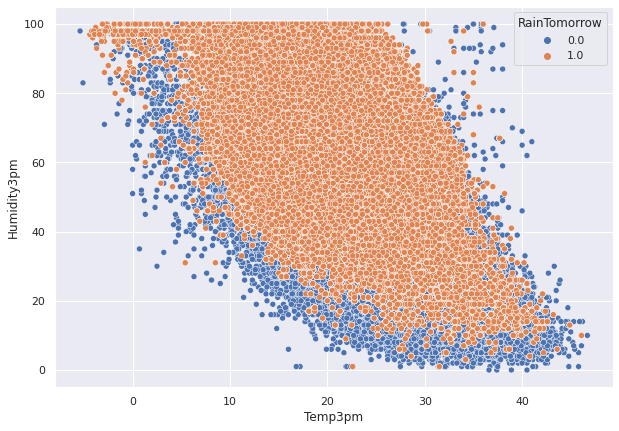

In [18]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Temp3pm', y='Humidity3pm', data=oversampled, hue='RainTomorrow')

- If the temperature today is low and humidity is high, it may rain tomorrow.   
- If temperature today is high and humidity is low, it may not rain tomorrow.

In [19]:
print("Unique wind gust directions and their counts :")
windgustdir = oversampled["WindGustDir"].value_counts()
windgustdir = windgustdir.reset_index()
windgustdir.columns= ["Wind Gust Direction", "Counts"]
print(windgustdir)

Unique wind gust directions and their counts :
   Wind Gust Direction  Counts
0                    W   16156
1                    N   15042
2                  WSW   13959
3                    S   13866
4                  WNW   13636
5                   NW   13541
6                   SE   13485
7                  SSE   13374
8                  SSW   13310
9                   SW   13221
10                   E   12388
11                 NNW   11236
12                 ENE   11210
13                  NE   10387
14                 ESE   10256
15                 NNE   10074


In [20]:
plt.figure(figsize=(10,7))
# Creating Bar plot
fig = px.bar(windgustdir, x="Wind Gust Direction", y="Counts", title="Arrangement Of Wind Gust Directions By Counts From Highest To Lowest", color="Counts")
# Displaying Bar plot
fig.show()

<Figure size 720x504 with 0 Axes>

# Data Preprocessing 

### *Checking For Duplicates*

In [21]:
data.duplicated().sum()

0

There is NO Duplicates in Data 

### *Checking For Nulls*

In [22]:
oversampled.isnull().sum()

Date                  0
Location              0
MinTemp            1082
MaxTemp             471
Rainfall           3124
Evaporation       95411
Sunshine         104831
WindGustDir       15491
WindGustSpeed     15354
WindDir9am        14728
WindDir3pm         6440
WindSpeed9am       2206
WindSpeed3pm       4353
Humidity9am        3171
Humidity3pm        6031
Pressure9am       21728
Pressure3pm       21746
Cloud9am          81339
Cloud3pm          85614
Temp9am            1653
Temp3pm            4558
RainToday          3124
RainTomorrow          0
dtype: int64

There are significant amount of missing values in the dataset especially in columns like "sunshine", "Evaporation","Cloud3pm", "cloud9pm". Let's deal with them.

<AxesSubplot:>

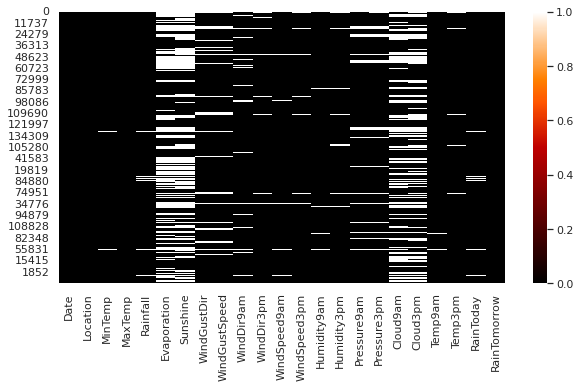

In [23]:
# Where are missing values located in the dataset
plt.figure(figsize=(10,5))
sns.heatmap(oversampled.isnull(), cbar = True, cmap="gist_heat")

In [24]:
oversampled.dropna(subset=['Evaporation', 'Sunshine','Cloud9am','Cloud3pm'],inplace = True)
oversampled['Humidity9am'] = oversampled['Humidity9am'].fillna(method= "ffill")
oversampled['Humidity3pm'] = oversampled['Humidity3pm'].fillna(method= "ffill")
oversampled['Pressure9am'] = oversampled['Pressure9am'].fillna(method= "ffill")
oversampled['Pressure3pm'] = oversampled['Pressure3pm'].fillna(method= "ffill")
oversampled['PTemp9am'] = oversampled['Temp9am'].fillna(method= "bfill")
oversampled['Temp3pm'] = oversampled['Temp3pm'].fillna(method= "bfill")
oversampled['WindSpeed3pm'] = oversampled['WindSpeed3pm'].fillna(method= "bfill")
oversampled['MaxTemp'] = oversampled['MaxTemp'].fillna(method= "bfill")
oversampled['MinTemp'] = oversampled['MinTemp'].fillna(method= "bfill")
oversampled['Temp9am'] = oversampled['Temp9am'].fillna(method= "bfill")
oversampled['Rainfall'] = oversampled['Rainfall'].fillna(method= "bfill") 
oversampled['WindSpeed9am'] = oversampled['WindSpeed9am'].fillna(method= "bfill")

 ### *imputing the categorical columns with mode.*

In [25]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [26]:
# Impute categorical var with Mode
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])
oversampled['RainToday'] = oversampled['RainToday'].fillna(oversampled['RainToday'].mode()[0])
oversampled['WindGustSpeed'] = oversampled['WindGustSpeed'].fillna(oversampled['WindGustSpeed'].mode()[0])

### *Handling Cardinality issue*

In [27]:
data["Date"] = pd.to_datetime(data["Date"])   #Converting into Date
data["Year"] = data["Date"].dt.year           #abstracting year in different column 
data["Month"] = data["Date"].dt.month         #abstracting month in diffrent column  
data["Day"] = data["Date"].dt.day  

In [28]:
# Dropping Date Column 

data.drop("Date", axis = 1, inplace = True)
data.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5


### *Using label encoder to convert Categorical data into numerical data*

In [29]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [30]:
le=LabelEncoder
Location_le=LabelEncoder()
oversampled['Location']=Location_le.fit_transform(oversampled['Location'])
WindGustDir_le=LabelEncoder()
oversampled['WindGustDir']=WindGustDir_le.fit_transform(oversampled['WindGustDir'])
WindDir9am_le=LabelEncoder()
oversampled['WindDir9am']=WindDir9am_le.fit_transform(oversampled['WindDir9am'])
WindDir3pm_le=LabelEncoder()
oversampled['WindDir3pm']=WindDir3pm_le.fit_transform(oversampled['WindDir3pm'])
Date_le=LabelEncoder()
oversampled['Date']=Date_le.fit_transform(oversampled['Date'])

In [31]:
Location_le.classes_

array(['Albany', 'AliceSprings', 'Brisbane', 'Cairns', 'Canberra',
       'Cobar', 'CoffsHarbour', 'Darwin', 'Hobart', 'Melbourne',
       'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier',
       'NorfolkIsland', 'Nuriootpa', 'Perth', 'PerthAirport', 'Portland',
       'Sale', 'Sydney', 'SydneyAirport', 'Townsville', 'WaggaWagga',
       'Watsonia', 'Williamtown', 'Woomera'], dtype=object)

In [32]:
WindGustDir_le.classes_

array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)

In [33]:
WindDir9am_le.classes_

array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)

In [34]:
WindDir3pm_le.classes_

array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)

In [35]:
Date_le.classes_

array(['2007-11-01', '2007-11-02', '2007-11-03', ..., '2017-06-23',
       '2017-06-24', '2017-06-25'], dtype=object)

In [36]:
oversampled.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,PTemp9am
6049,427,5,17.9,35.2,0.0,12.0,12.3,11,48.0,1,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0,0.0,26.6
6050,428,5,18.4,28.9,0.0,14.8,13.0,8,37.0,10,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0,0.0,20.3
6052,430,5,19.4,37.6,0.0,10.8,10.6,5,46.0,5,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0,0.0,28.7
6053,431,5,21.9,38.4,0.0,11.4,12.2,14,31.0,14,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0.0,0.0,29.1
6054,432,5,24.2,41.0,0.0,11.2,8.4,14,35.0,7,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0.0,0.0,33.6


In [37]:
oversampled.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
PTemp9am         0
dtype: int64

### *Handling Outliers*

<AxesSubplot:xlabel='Rainfall'>

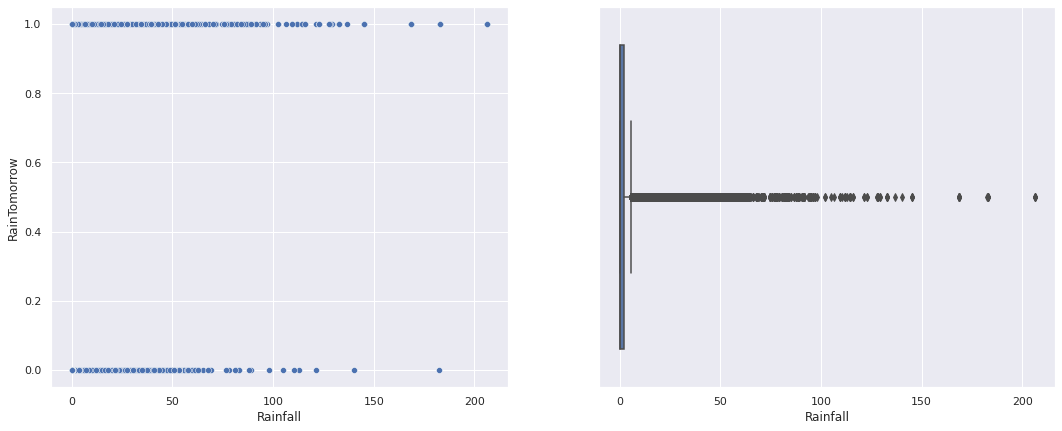

In [38]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)
sns.scatterplot(data=oversampled,x='Rainfall',y='RainTomorrow')
plt.subplot(1,2,2)
sns.boxplot(data=oversampled,x='Rainfall')

In [39]:
# Detecting outliers with IQR
Q1 = oversampled.quantile(0.25)
Q3 = oversampled.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1419.0
Location           13.0
MinTemp             9.8
MaxTemp            10.7
Rainfall            2.2
Evaporation         4.4
Sunshine            6.7
WindGustDir        10.0
WindGustSpeed      17.0
WindDir9am          8.0
WindDir3pm          9.0
WindSpeed9am       11.0
WindSpeed3pm       13.0
Humidity9am        24.0
Humidity3pm        29.0
Pressure9am         9.6
Pressure3pm         9.7
Cloud9am            5.0
Cloud3pm            4.0
Temp9am            10.1
Temp3pm            10.3
RainToday           1.0
RainTomorrow        1.0
PTemp9am           10.1
dtype: float64


In [40]:
# Removing outliers from the dataset
oversampled = oversampled[~((oversampled< (Q1 - 1.5 * IQR)) |(oversampled > (Q3 + 1.5 * IQR))).any(axis=1)]
oversampled.shape

(74821, 24)

### *Feature Engineering*

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



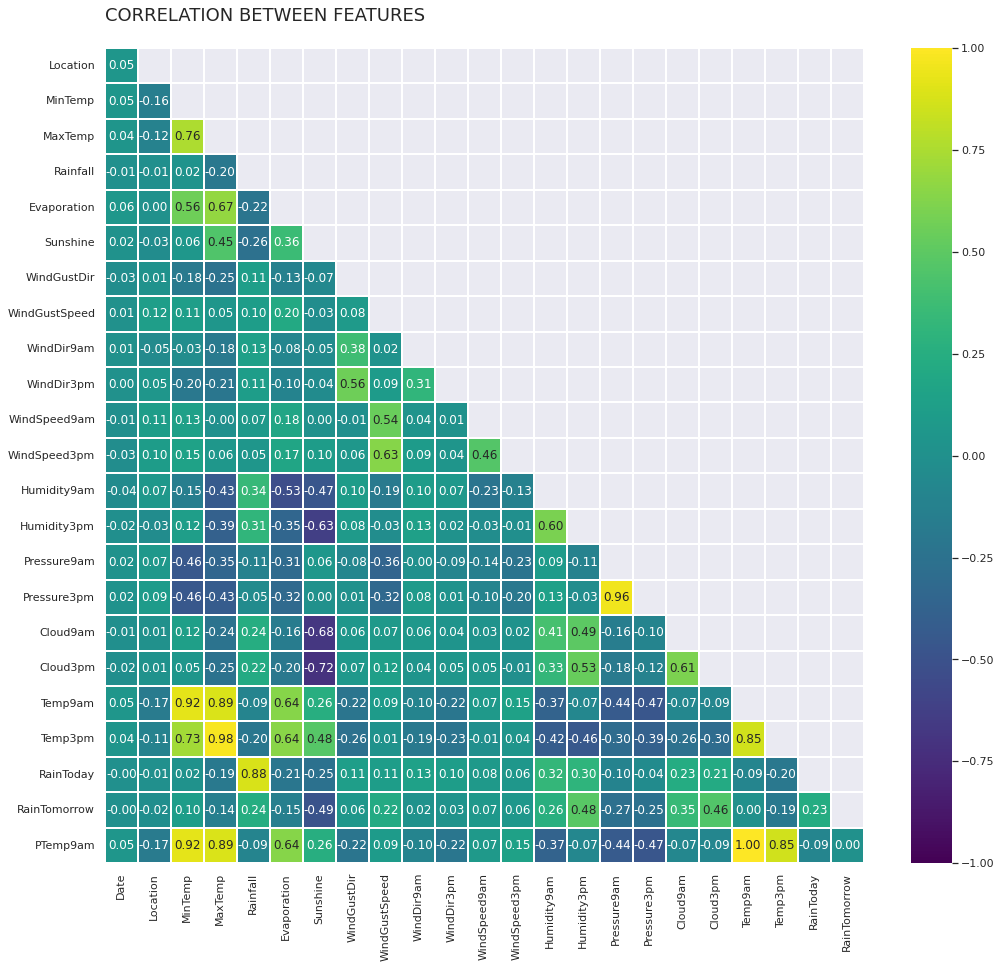

In [41]:
# Correlation Heatmap
plt.figure(figsize=(17,15))

# corr
data_corr = oversampled.corr()
# mask
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = data_corr.iloc[1:,:-1].copy()

sns.heatmap(corr, cmap = 'viridis', annot = True, vmin= -1, vmax= 1, linewidths=1.5, fmt='.2f', mask=mask);
plt.title('CORRELATION BETWEEN FEATURES\n', loc='left', fontsize=18);

After checking the correlation between the different variables, We found a pair of highly correlated variables, we will discard one while keeping the other.We will remove 'Temp9am', 'Temp3pm', 'Pressure3pm' as this columns are irrelevant attributes.

In [42]:
oversampled.dropna(subset=['Temp9am', 'Temp3pm','Pressure3pm'],inplace = True)

In [43]:
#Scaling data 
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(oversampled)
modified_data = pd.DataFrame(r_scaler.transform(oversampled), index=oversampled.index, columns=oversampled.columns)

In [44]:
x = oversampled.drop('RainTomorrow', axis= 1).values 
y = oversampled['RainTomorrow'].values

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=20)

## *Data Standardization* 

In [46]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Modeling

## *Logistic Regression*

In [47]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('reg accuracy : ', reg.score(X_test,y_test))

reg accuracy :  0.7906554046829894


<AxesSubplot:>

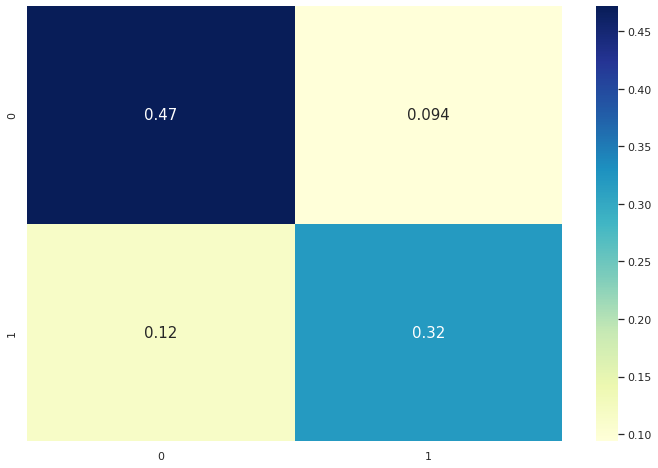

In [48]:
# confusion matrix
cmap1 ='YlGnBu'
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82     10577
         1.0       0.77      0.73      0.75      8129

    accuracy                           0.79     18706
   macro avg       0.79      0.78      0.79     18706
weighted avg       0.79      0.79      0.79     18706



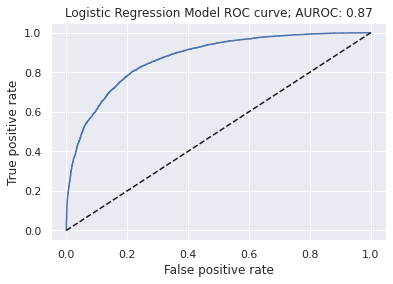

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = reg.predict_proba(np.array(X_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

plt.show()

## *Decision Tree*

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('dt accuracy : ', dt.score(X_test,y_test))

dt accuracy :  0.8901956591467978


[Text(0.5, 0.9, 'X[6] <= 0.216\ngini = 0.493\nsamples = 56115\nvalue = [31460, 24655]'),
 Text(0.25, 0.7, 'X[14] <= 0.737\ngini = 0.454\nsamples = 29060\nvalue = [10106, 18954]'),
 Text(0.125, 0.5, 'X[16] <= 0.239\ngini = 0.499\nsamples = 17271\nvalue = [8306, 8965]'),
 Text(0.0625, 0.3, 'X[8] <= 0.469\ngini = 0.461\nsamples = 9731\nvalue = [3512, 6219]'),
 Text(0.03125, 0.1, 'gini = 0.489\nsamples = 5566\nvalue = [2378, 3188]'),
 Text(0.09375, 0.1, 'gini = 0.396\nsamples = 4165\nvalue = [1134, 3031]'),
 Text(0.1875, 0.3, 'X[8] <= 0.643\ngini = 0.463\nsamples = 7540\nvalue = [4794, 2746]'),
 Text(0.15625, 0.1, 'gini = 0.442\nsamples = 6327\nvalue = [4237, 2090]'),
 Text(0.21875, 0.1, 'gini = 0.497\nsamples = 1213\nvalue = [557, 656]'),
 Text(0.375, 0.5, 'X[14] <= 1.24\ngini = 0.259\nsamples = 11789\nvalue = [1800, 9989]'),
 Text(0.3125, 0.3, 'X[15] <= -0.106\ngini = 0.37\nsamples = 5218\nvalue = [1280, 3938]'),
 Text(0.28125, 0.1, 'gini = 0.274\nsamples = 2732\nvalue = [447, 2285]'),
 

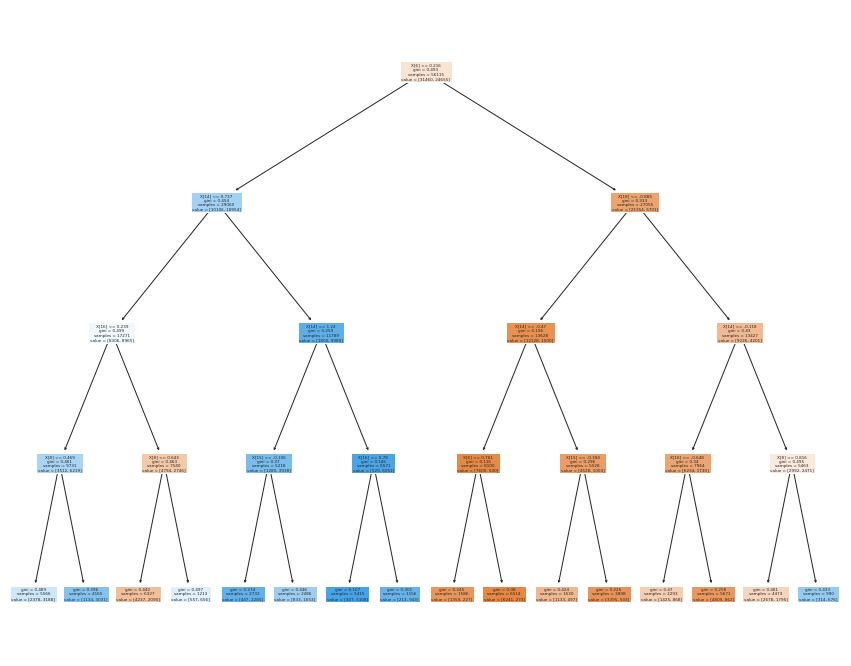

In [52]:
dt =DecisionTreeClassifier(max_features=18 , max_depth=4)
dt.fit(X_train , y_train)
dt.score(X_train , y_train)
from sklearn import tree
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

<AxesSubplot:>

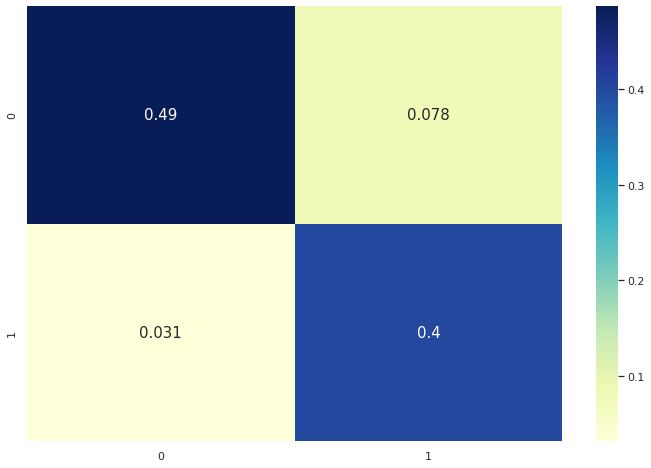

In [53]:
# confusion matrix
cmap1 ='YlGnBu'
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90     10577
         1.0       0.84      0.93      0.88      8129

    accuracy                           0.89     18706
   macro avg       0.89      0.89      0.89     18706
weighted avg       0.90      0.89      0.89     18706



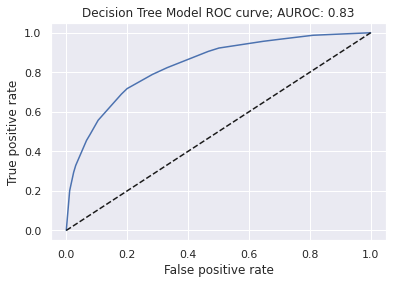

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dt.predict_proba(np.array(X_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

plt.title(f'Decision Tree Model ROC curve; AUROC: {AUROC}');

plt.show()

## *Random Forest*

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('rf accuracy : ', rf.score(X_test,y_test))

rf accuracy :  0.950871378167433


<AxesSubplot:>

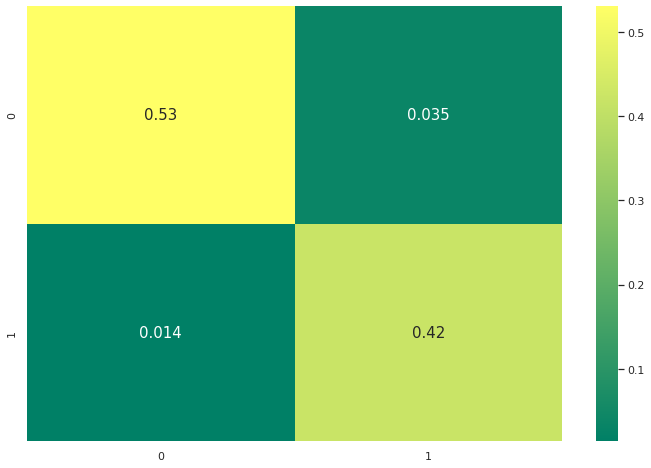

In [57]:
# confusion matrix
cmap1 ='summer'
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96     10577
         1.0       0.92      0.97      0.94      8129

    accuracy                           0.95     18706
   macro avg       0.95      0.95      0.95     18706
weighted avg       0.95      0.95      0.95     18706



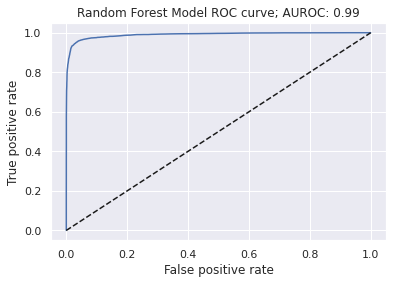

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rf.predict_proba(np.array(X_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

plt.title(f'Random Forest Model ROC curve; AUROC: {AUROC}');

plt.show()

## *KNN*

In [60]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('KNN accuracy : ', classifier.score(X_test,y_test))

KNN accuracy :  0.9169250507858441


<AxesSubplot:>

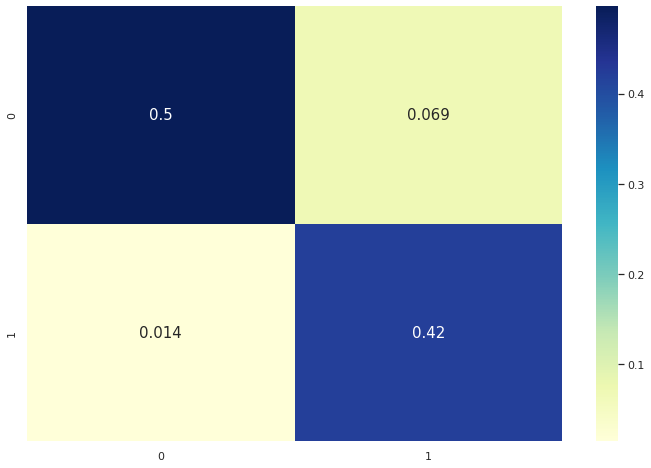

In [61]:
# confusion matrix
cmap1 ='YlGnBu'
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92     10577
         1.0       0.86      0.97      0.91      8129

    accuracy                           0.92     18706
   macro avg       0.92      0.92      0.92     18706
weighted avg       0.92      0.92      0.92     18706



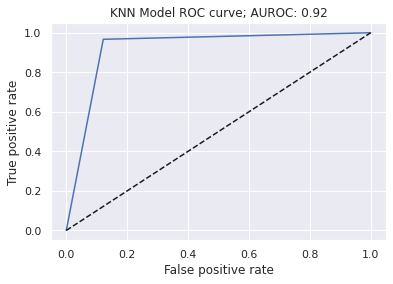

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = classifier.predict_proba(np.array(X_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

plt.title(f'KNN Model ROC curve; AUROC: {AUROC}');

plt.show()

## *Naive Bayes*

In [64]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print('nb accuracy : ', nb.score(X_test,y_test))

nb accuracy :  0.7536619266545493


<AxesSubplot:>

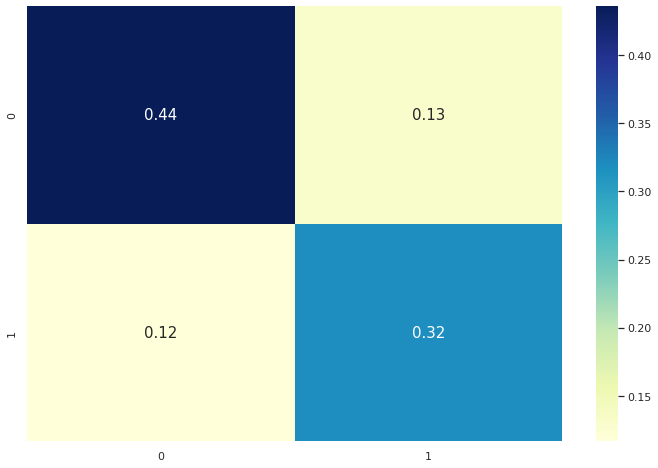

In [65]:
# confusion matrix
cmap1 ='YlGnBu'
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78     10577
         1.0       0.71      0.73      0.72      8129

    accuracy                           0.75     18706
   macro avg       0.75      0.75      0.75     18706
weighted avg       0.75      0.75      0.75     18706



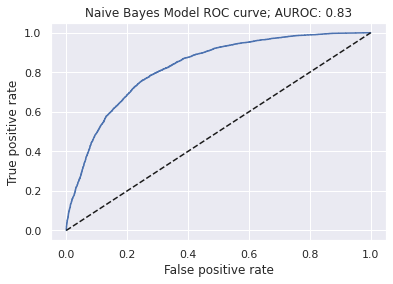

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = nb.predict_proba(np.array(X_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

plt.title(f'Naive Bayes Model ROC curve; AUROC: {AUROC}');

plt.show()

## *Support Vector Machine*

In [68]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('SVM accuracy : ', svc.score(X_test,y_test))

SVM accuracy :  0.8219822516839517


<AxesSubplot:>

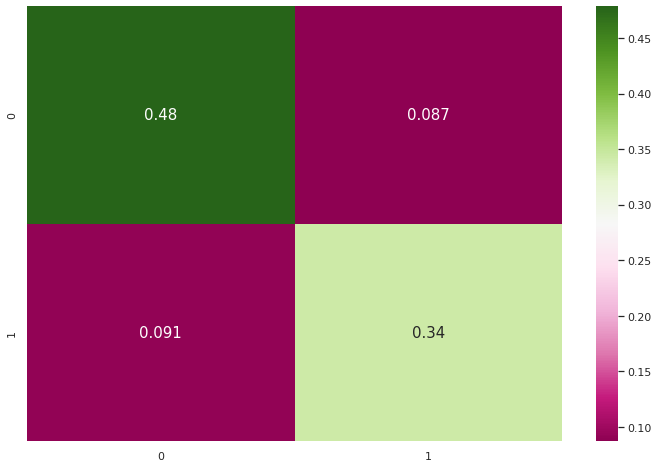

In [69]:
# confusion matrix
cmap1 = 'PiYG'
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84     10577
         1.0       0.80      0.79      0.79      8129

    accuracy                           0.82     18706
   macro avg       0.82      0.82      0.82     18706
weighted avg       0.82      0.82      0.82     18706



## *XGBOOST*

In [71]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('XGBOOST accuracy : ', model.score(X_test,y_test))

XGBOOST accuracy :  0.8675825938201647


<AxesSubplot:>

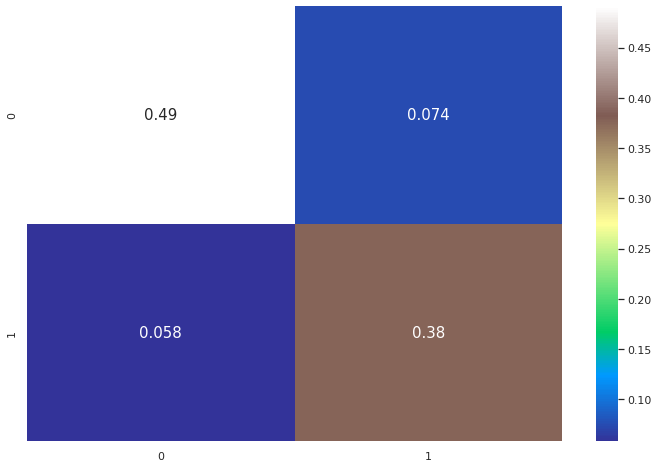

In [72]:
# confusion matrix
cmap1 ='terrain'
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     10577
         1.0       0.84      0.87      0.85      8129

    accuracy                           0.87     18706
   macro avg       0.86      0.87      0.87     18706
weighted avg       0.87      0.87      0.87     18706



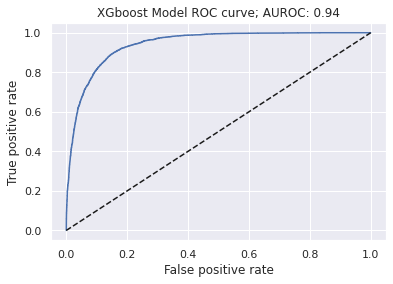

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = model.predict_proba(np.array(X_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

plt.title(f'XGboost Model ROC curve; AUROC: {AUROC}');

plt.show()

In [75]:
# Tensorflow
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
model = Sequential()
# Adding layers 
model.add(Dense(20, activation='relu')) 
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu')) 
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid')) # Output layer

2022-11-10 22:16:36.896125: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [76]:
#Compiling the moodel 
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['Accuracy'])
earlystopping = callbacks.EarlyStopping(monitor='val_loss',
                                        mode='min',
                                        verbose=1,
                                        patience=20)

In [77]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 32, epochs = 50, callbacks =[earlystopping])

2022-11-10 22:16:37.367213: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
1754/1754 [==============================] - 4s 2ms/step - loss: 0.5212 - Accuracy: 0.7441 - val_loss: 0.4508 - val_Accuracy: 0.7860
Epoch 2/50
1754/1754 [==============================] - 4s 2ms/step - loss: 0.4725 - Accuracy: 0.7790 - val_loss: 0.4415 - val_Accuracy: 0.7912
Epoch 3/50
1754/1754 [==============================] - 3s 2ms/step - loss: 0.4628 - Accuracy: 0.7833 - val_loss: 0.4364 - val_Accuracy: 0.7947
Epoch 4/50
1754/1754 [==============================] - 3s 2ms/step - loss: 0.4563 - Accuracy: 0.7865 - val_loss: 0.4333 - val_Accuracy: 0.7987
Epoch 5/50
1754/1754 [==============================] - 3s 2ms/step - loss: 0.4541 - Accuracy: 0.7867 - val_loss: 0.4292 - val_Accuracy: 0.8005
Epoch 6/50
1754/1754 [==============================] - 3s 2ms/step - loss: 0.4507 - Accuracy: 0.7893 - val_loss: 0.4253 - val_Accuracy: 0.7990
Epoch 7/50
1754/1754 [==============================] - 3s 2ms/step - loss: 0.4481 - Accuracy: 0.7909 - val_loss: 0.4236 - val_Accuracy:

In [78]:
model_acc = round(accuracy_score(y_pred,y_test) * 100, 2)
print(model_acc,'%')

86.76 %


<AxesSubplot:>

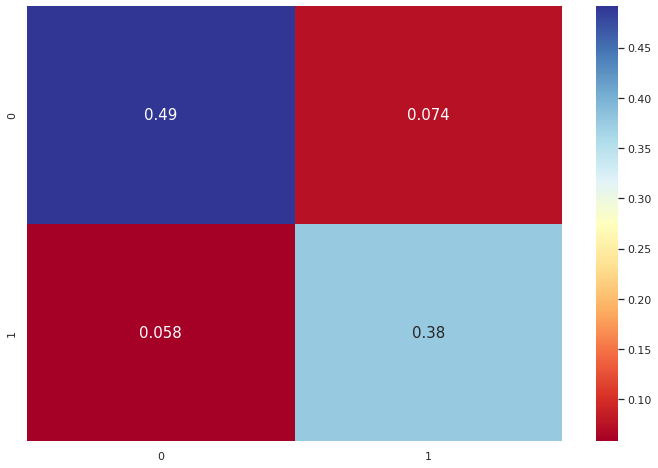

In [79]:
# confusion matrix
cmap1 ='RdYlBu'
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     10577
         1.0       0.84      0.87      0.85      8129

    accuracy                           0.87     18706
   macro avg       0.86      0.87      0.87     18706
weighted avg       0.87      0.87      0.87     18706

